### Hint: You may need to execute 'export PYTHONPATH=$PYTHONPATH:/path/to/keras' to make keras available in ipython notebook, execute in shell before starting ipython notebook

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## Data

Create synthetic data. We use here two interleaving half circles, generated by sklearn. 20% is taken for testing.

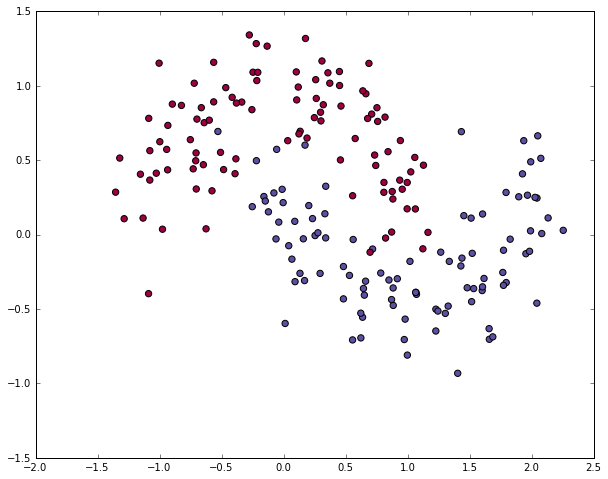

In [2]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

## Logistic Regression (Net of Size 1)

Define Architecture. Lets Start with a small one (in fact it is logistic regression)

Using Theano backend.
/home/sefidrodi/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


151208/151208 [==============================] - 1s     


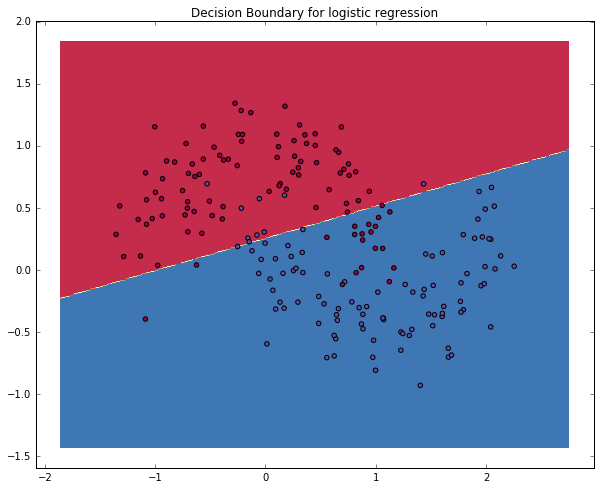

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(1, input_dim=2, init='uniform', activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adadelta',class_mode='binary')
model.fit(X, y, nb_epoch=40000, verbose = 0)
plot_decision_boundary(lambda x: model.predict_classes(x),X,y)
plt.title("Decision Boundary for logistic regression")

## MLP with 3 hidden units

Lets try a more complex model. We add a small hidden layer and one output layer. 

151208/151208 [==============================] - 1s     


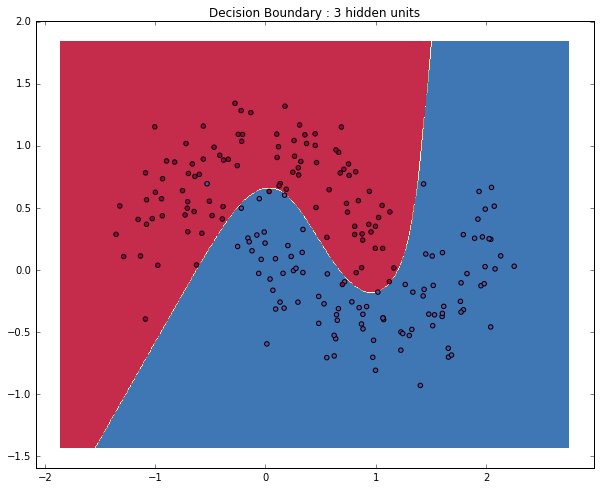

In [4]:
model = Sequential()
model.add(Dense(3, input_dim=2,activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adadelta',class_mode='binary')
model.fit(X, y, nb_epoch=40000, verbose=0)
plot_decision_boundary(lambda x: model.predict_classes(x),X,y)
plt.title("Decision Boundary : 3 hidden units")

## Bigger = Better?

151208/151208 [==============================] - 2s     


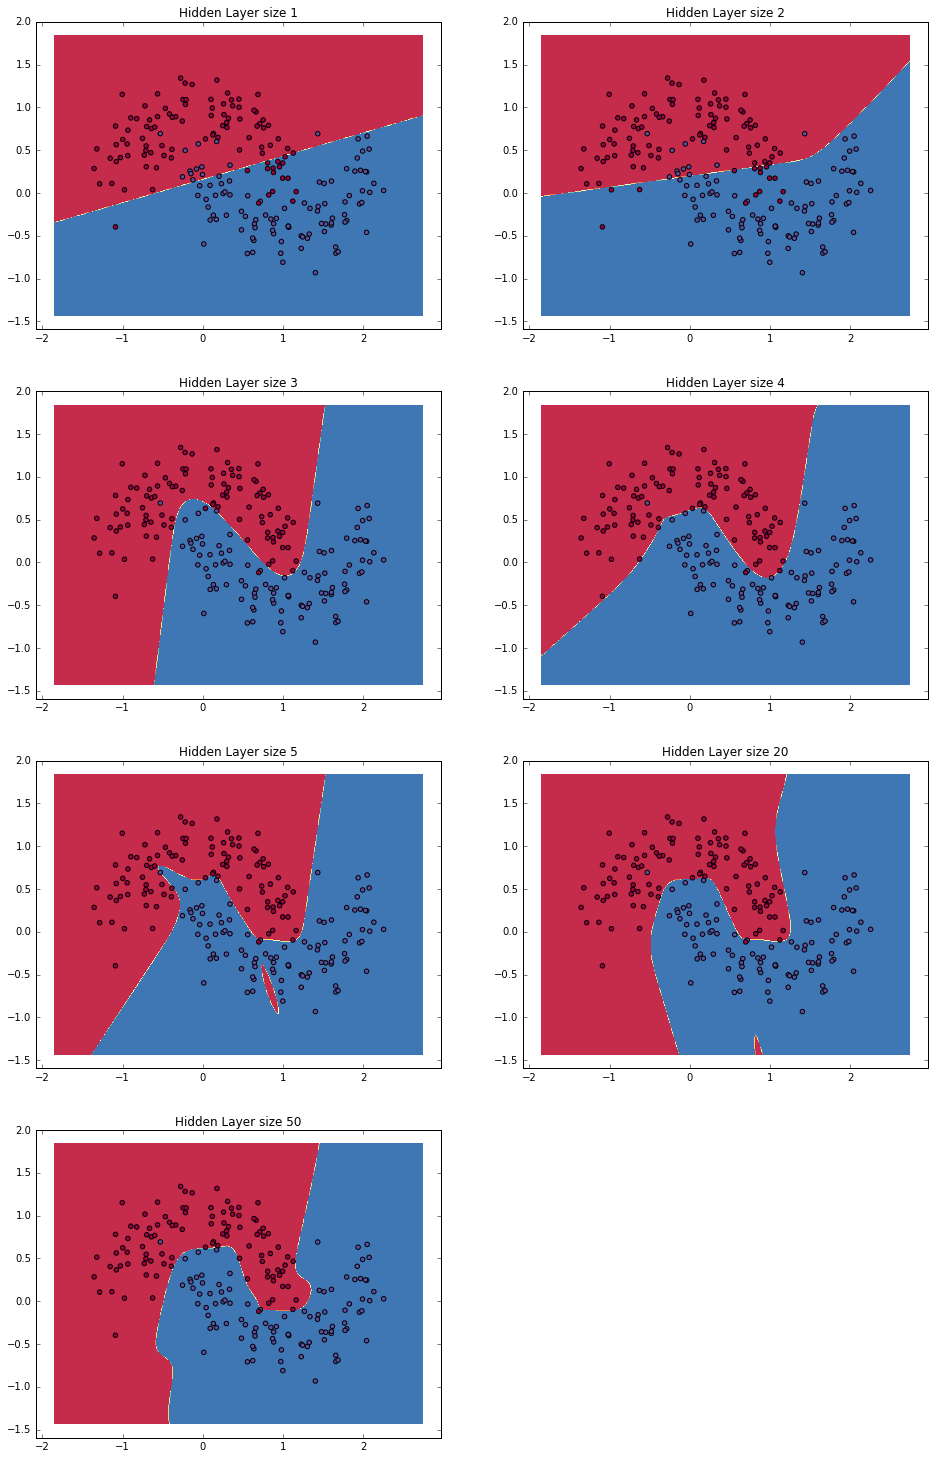

In [5]:
def train_model(num_hidden_units):
    model = Sequential()
    model.add(Dense(num_hidden_units, input_dim=2,activation='tanh'))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='binary_crossentropy', optimizer='adadelta',class_mode='binary')
    model.fit(X, y, nb_epoch=40000, verbose=0)
    return model


plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = train_model(nn_hdim)
    plot_decision_boundary(lambda x: model.predict_classes(x),X,y)

## Prevent Overfitting

151208/151208 [==============================] - 1s     


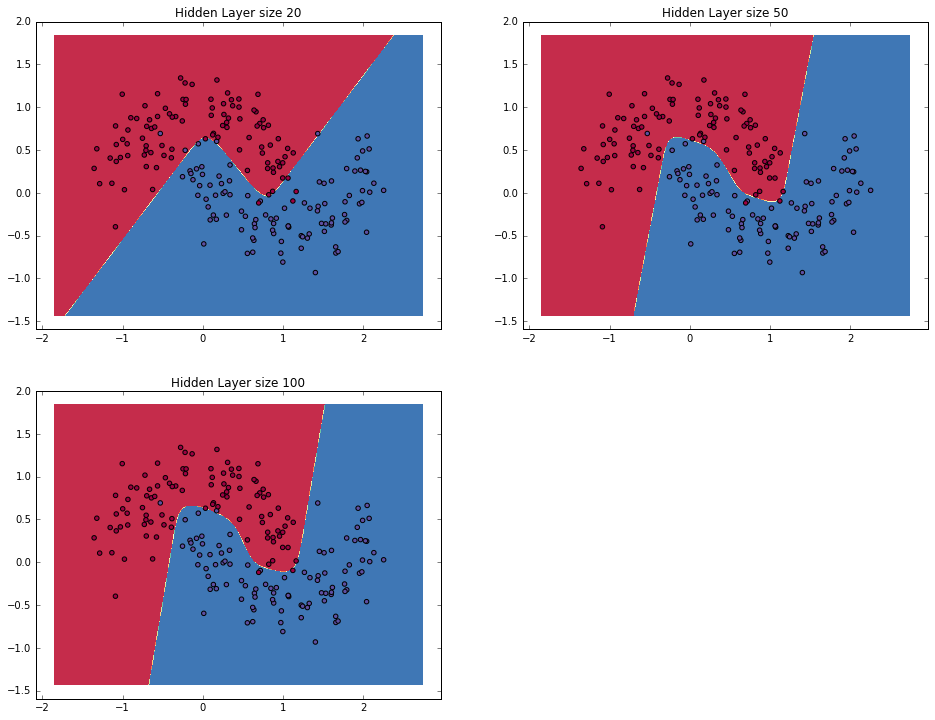

In [6]:
def train_model(num_hidden_units):
    model = Sequential()
    model.add(Dense(num_hidden_units, input_dim=2,activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='binary_crossentropy', optimizer='adadelta',class_mode='binary')
    model.fit(X, y, nb_epoch=40000, verbose=0)
    return model


plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [20, 50, 100]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = train_model(nn_hdim)
    plot_decision_boundary(lambda x: model.predict_classes(x),X,y)